# Ingest

In the Ingest section, we import the necessary libraries, load the Vinho Verde wine dataset, and display the first 5 rows of the dataset.

The [Vinho Verde dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) contains information about the fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality of wines from the north of Portugal.


In [14]:
# Import necessary libraries
import pandas as pd

#Load dataset
red_wine_url = "https://raw.githubusercontent.com/nogibjj/cloud-hosted_notebook_rt/main/src/winequality-red.csv"
white_wine_url = "https://raw.githubusercontent.com/nogibjj/cloud-hosted_notebook_rt/main/src/winequality-white.csv"

red_wine_df = pd.read_csv(red_wine_url, sep=';')
white_wine_df = pd.read_csv(white_wine_url, sep=';')

In [24]:
#Display first 5 rows of each dataset
red_wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
white_wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Wine Quality Analysis

In this analysis, we'll explore the distinct characteristics of red and white wines and examine how they relate to wine quality. Our analysis will delve into several key components

In [ ]:
#Merging(ignoring index) and Labeling:

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)
print(wine_df)

In [18]:
#Descriptive Analysis:

# Selecting desired columns
cols_of_interest = ['fixed acidity', 'alcohol', 'quality']

# Extracting descriptive statistics
red_desc = red_wine_df[cols_of_interest].describe()

# Display the statistics
print("Wine Descriptive Statistics:")
print(red_desc)


Wine Descriptive Statistics:
       fixed acidity      alcohol      quality
count    1599.000000  1599.000000  1599.000000
mean        8.319637    10.422983     5.636023
std         1.741096     1.065668     0.807569
min         4.600000     8.400000     3.000000
25%         7.100000     9.500000     5.000000
50%         7.900000    10.200000     6.000000
75%         9.200000    11.100000     6.000000
max        15.900000    14.900000     8.000000


In [19]:
red_desc = white_wine_df[cols_of_interest].describe()
print(red_desc)

       fixed acidity      alcohol      quality
count    4898.000000  4898.000000  4898.000000
mean        6.854788    10.514267     5.877909
std         0.843868     1.230621     0.885639
min         3.800000     8.000000     3.000000
25%         6.300000     9.500000     5.000000
50%         6.800000    10.400000     6.000000
75%         7.300000    11.400000     6.000000
max        14.200000    14.200000     9.000000


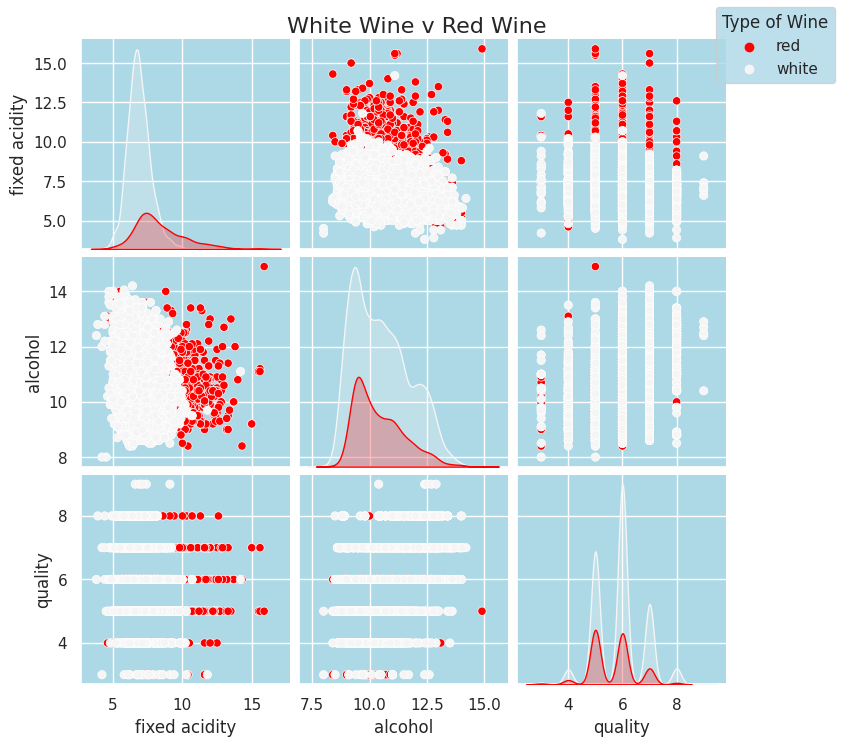

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Use a blue background
sns.set(style="darkgrid", rc={"axes.facecolor": "lightblue", "grid.color": "white"})

wine_palette = {'red': 'red', 'white': 'whitesmoke'}

pair_plot = sns.pairplot(wine_df[['fixed acidity', 'alcohol', 'quality', 'wine_type']], hue="wine_type", height=2.5, palette=wine_palette)

plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('White Wine v Red Wine', fontsize=16)

handles = pair_plot._legend_data.values()
labels = pair_plot._legend_data.keys()
pair_plot._legend.remove()
pair_plot.fig.legend(handles=handles, labels=labels, title='Type of Wine', loc='upper right')

plt.show()

# Results

While both wine types showcase a median quality rating of around 6, red wines exhibit a slight skew towards higher ratings. This suggests that there might be a higher proportion of red wines that are rated as being of superior quality compared to white wines.